In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
x, y = make_classification(n_samples=5000, n_classes=2, n_features=50, random_state=42)

print(x.shape)

(5000, 50)


**PCA**

In [8]:
pca = PCA(n_components=10)
x_pca = pca.fit_transform(x)

In [9]:
print(f"Explained variance per component: {pca.explained_variance_ratio_}")

print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.3f}")

Explained variance per component: [0.0634895  0.03772795 0.02316062 0.02283749 0.02248392 0.02246137
 0.02208881 0.02204322 0.02202779 0.0217252 ]
Total explained variance: 0.280


- Find optimal number of components

In [10]:
pca_full = PCA()
pca_full.fit(x)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

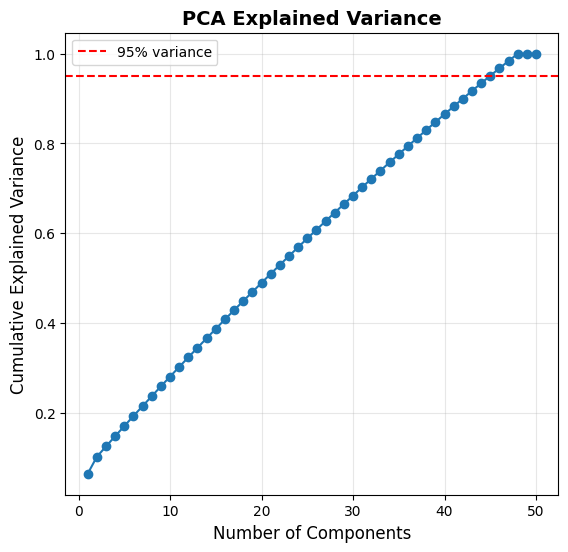

In [16]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('PCA Explained Variance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)


In [17]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nComponents needed for 95% variance: {n_components_95}")


Components needed for 95% variance: 45


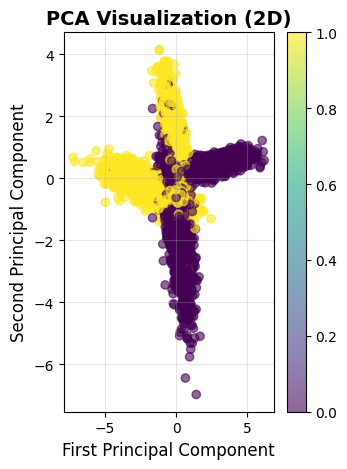

In [18]:
plt.subplot(1, 2, 2)
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('PCA Visualization (2D)', fontsize=14, fontweight='bold')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Use PCA for dimensionality reduction

In [19]:
pca_reduced = PCA(n_components=0.95)
X_pca_reduced = pca_reduced.fit_transform(x)

print(f"\nOriginal dimensions: {x.shape[1]}")
print(f"Reduced dimensions: {X_pca_reduced.shape[1]}")


Original dimensions: 50
Reduced dimensions: 45


**t-SNE (slow for large datasets)**

In [22]:
x_sample = x[:1000]
y_sample = y[:1000]

tnse = TSNE(n_components=2, random_state=42, perplexity=30)
x_tnse =tnse.fit_transform(x_sample)

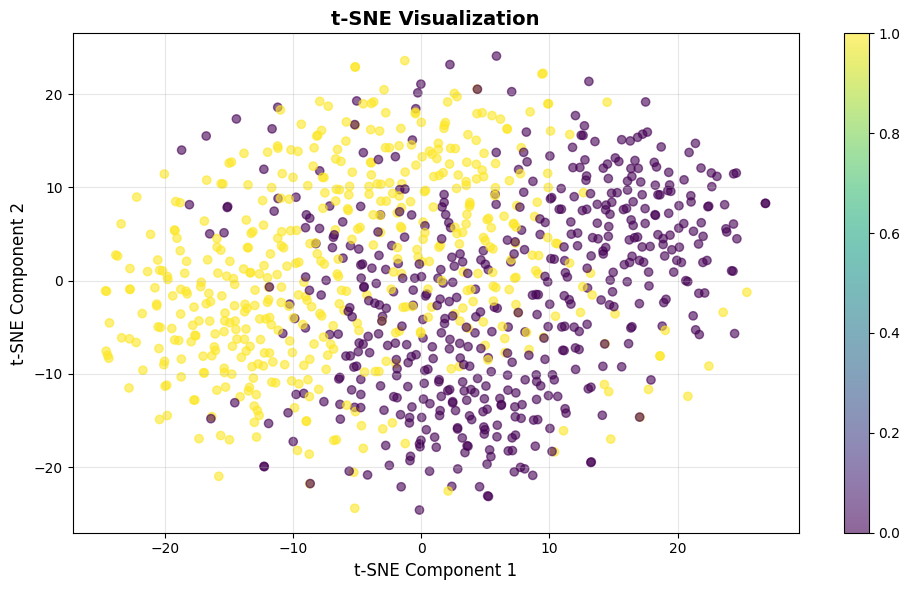

In [23]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_tnse[:, 0], x_tnse[:, 1], c=y_sample, cmap='viridis', alpha=0.6)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('t-SNE Visualization', fontsize=14, fontweight='bold')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()